<a href="https://colab.research.google.com/github/pratikghodke777/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_final_2_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


---



---



## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### **Description**: Product (item) name. Nominal.
* ### **Quantity**: The quantities of each product (item) per transaction. Numeric.
* ### **InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
* ### **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### **Country**: Country name. Nominal, the name of the country where each customer resides.


---



---



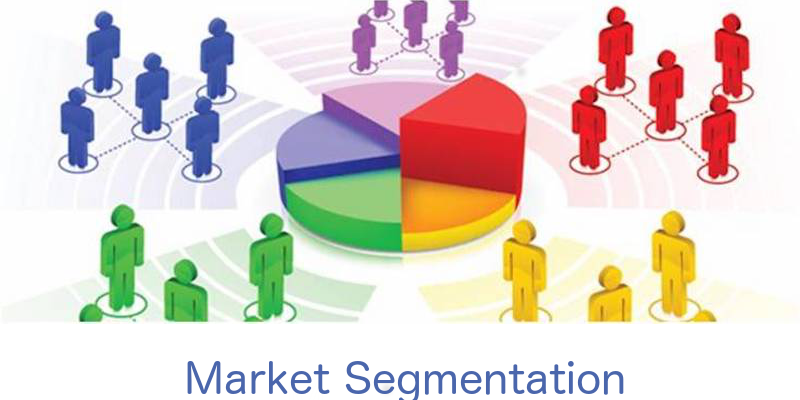

# **Importing required Library**

---



---



In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
 import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

## **Mounting Drive To Featch Data Set**

---



---


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Assign File Location**

---



---

In [6]:
Data_file="/content/drive/MyDrive/Capston projects/onlie retail customer segment/Online Retail.xlsx"
Data = pd.read_excel(Data_file)

# **Checking shape of dataframe**

In [7]:
Data.shape

(541909, 8)

# **Checking top 5 records**

In [8]:
Data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
Data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# **Descriptive Statistics**

In [11]:
Data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# **Checking number of unique values in each column**

In [12]:
for col in Data.columns:
  print(col,':',Data[col].nunique())

InvoiceNo : 25900
StockCode : 4070
Description : 4223
Quantity : 722
InvoiceDate : 23260
UnitPrice : 1630
CustomerID : 4372
Country : 38


# **Feature Engineering -: Handling missing value,Null value**

---



---



# **1.Missing data counts and percentage**

In [13]:
missing = Data.columns[Data.isnull().any()].tolist()
print('Count of Missing Data ')
print(Data[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print(' Percentage of Missing Data')
print(round(Data[missing].isnull().sum().sort_values(ascending = False)/len(Data)*100,2))

Count of Missing Data 
CustomerID     135080
Description      1454
dtype: int64
------------------------
 Percentage of Missing Data
CustomerID     24.93
Description     0.27
dtype: float64


In [15]:
#Dropping the rows with nulls
Data.dropna(inplace=True)

# **2.Checking duplicates**

In [16]:
print(len(Data[Data.duplicated()]))

5225


In [17]:
# Dropping duplicate rows
Data.drop_duplicates(inplace=True)

# **3.New Shape**

In [20]:
Data.shape

(401604, 8)

In [23]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB




---



---


# **Data Feature Engineering**

---



---



**1.Creating new features from the datetime column InvoiceDate**

In [26]:
Data["year"]  = Data["InvoiceDate"].apply(lambda x: x.year)
Data['Month'] = Data['InvoiceDate'].apply(lambda x: x.month_name())
Data['Day']   = Data['InvoiceDate'].apply(lambda x: x.day_name())
Data["hour"]  = Data["InvoiceDate"].apply(lambda x: x.hour)

**2.Creating a new feature 'TotalAmount' by multiplying Quantity and UnitPrice**

In [28]:
Data['Total_Amount_purchase'] = Data['Quantity']*Data['UnitPrice']

**3.Creating a new feature 'TimeType' based on hours to define whether its Morning,Afternoon or Evening**

In [29]:
Data['TimeType'] = np.where((Data["hour"]>5)&(Data["hour"]<18), np.where(
                           Data["hour"]<12, 'Morning','Afternoon'),'Evening')

**4.InvoiceNo starting with 'C' represents cancellation**

In [30]:
Data['InvoiceNo'] = Data['InvoiceNo'].astype('str')
cancellations = Data[Data['InvoiceNo'].str.contains('C')]
cancellations.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,Month,Day,hour,TotalAmount,Total_Amount_purchase,TimeType
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010,December,Wednesday,9,-27.50,-27.50,Morning
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010,December,Wednesday,9,-4.65,-4.65,Morning
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,December,Wednesday,10,-19.80,-19.80,Morning
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,December,Wednesday,10,-6.96,-6.96,Morning
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,December,Wednesday,10,-6.96,-6.96,Morning


In [33]:
df = Data[~Data['InvoiceNo'].str.contains('C')]    #

# **EDA- By using Exploration of data and visualizing the features**

---



---



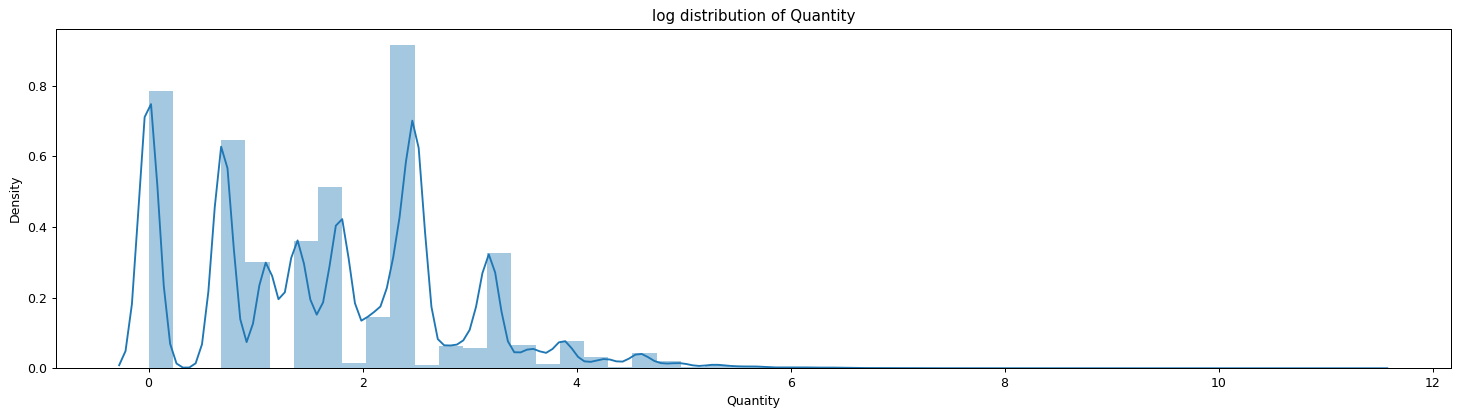

In [34]:
plt.figure(figsize=(20,5), dpi=90)
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']))
plt.show()

# **1.Most orders placed countries**

---



In [35]:
country_invoice = df.groupby("Country").nunique()["InvoiceNo"].reset_index().sort_values("InvoiceNo",ascending=False)
country_invoice.rename(columns={'InvoiceNo': 'Invoice_Count'}, inplace=True)
country_invoice.head()

,Country,Invoice_Count
35,United Kingdom,16649
14,Germany,457
13,France,389
10,EIRE,260
3,Belgium,98


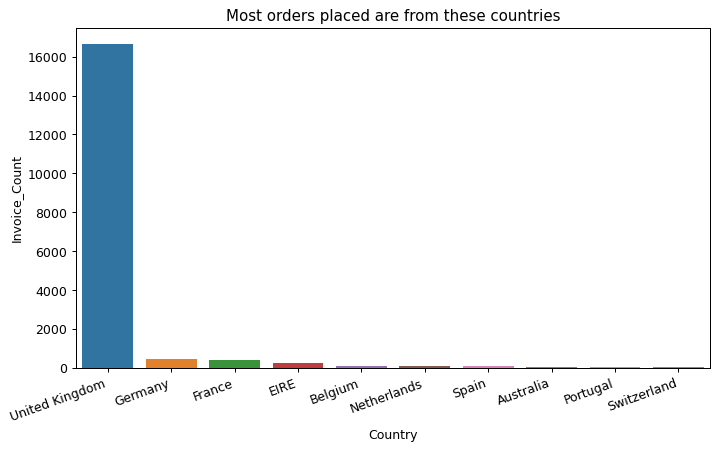

In [43]:
plt.figure(figsize=(20,5),dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most orders placed are from these countries")
sns.barplot(data=country_invoice.head(10),x="Country",y="Invoice_Count")


plt.show()

# **2.Visualizing top 10 countries based on average item purchases**

---



In [41]:
country_quantity = df.groupby("Country").mean()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
country_quantity.rename(columns={'Quantity': 'Average_Quantity'}, inplace=True)
country_quantity.head()

,Country,Average_Quantity
23,Netherlands,85.034702
19,Japan,81.046729
31,Sweden,80.173333
0,Australia,71.114020
8,Czech Republic,26.840000


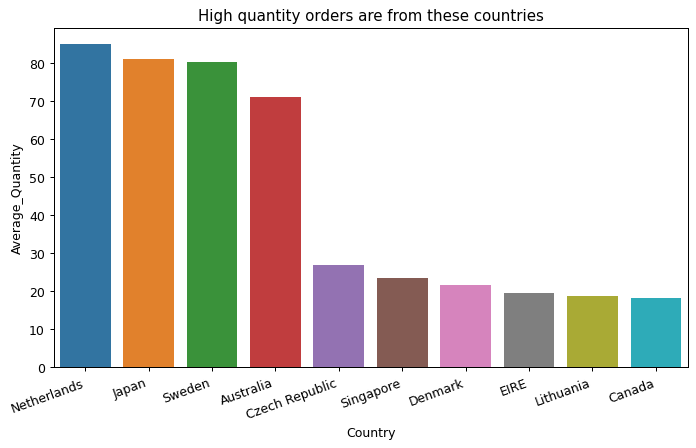

In [42]:
# Visualizing top 10 countries based on average item purchases 
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("High quantity orders are from these countries")
sns.barplot(data=country_quantity.head(10),x="Country",y="Average_Quantity")

# **3.quantity wise item purchases**


---



In [45]:
product_quantity = df.groupby("Description").sum()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
product_quantity.head()

,Description,Quantity
2319,"PAPER CRAFT , LITTLE BIRDIE",80995
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
1762,JUMBO BAG RED RETROSPOT,46078
3698,WHITE HANGING HEART T-LIGHT HOLDER,36706


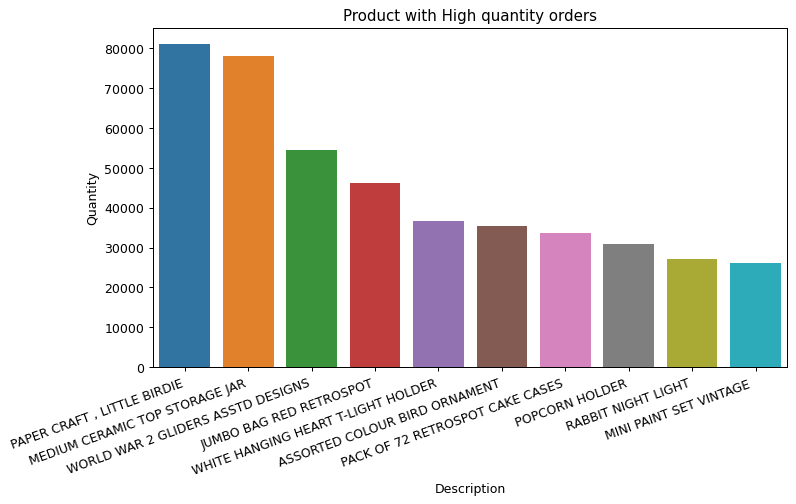

In [46]:
# Visualizing  
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with High quantity orders")
sns.barplot(data=product_quantity.head(10),x="Description",y="Quantity")

# **4.Amount wise item purchases**

---



In [47]:
product_price = df.groupby("Description").sum()["TotalAmount"].reset_index().sort_values("TotalAmount",ascending=False)
product_price.head()

,Description,TotalAmount
2319,"PAPER CRAFT , LITTLE BIRDIE",168469.60
2767,REGENCY CAKESTAND 3 TIER,142264.75
3698,WHITE HANGING HEART T-LIGHT HOLDER,100392.10
1762,JUMBO BAG RED RETROSPOT,85040.54
1992,MEDIUM CERAMIC TOP STORAGE JAR,81416.73


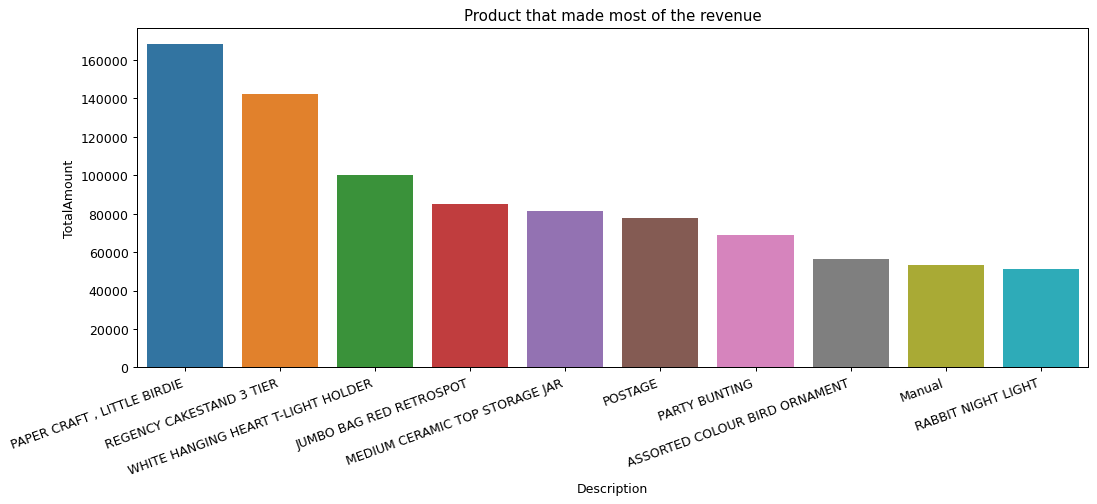

In [53]:
# Visualizing  
plt.figure(figsize=(30,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made most of the revenue")
sns.barplot(data=product_price.head(10),x="Description",y="TotalAmount")

# **5.Checking the number of cancellations by each customer.**


---



In [49]:
customer_cancellations = cancellations.groupby('CustomerID').count()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False)
customer_cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
customer_cancellations.head()

,CustomerID,Cancellations
736,14911.0,226
1485,17841.0,136
1397,17511.0,113
848,15311.0,112
89,12607.0,101


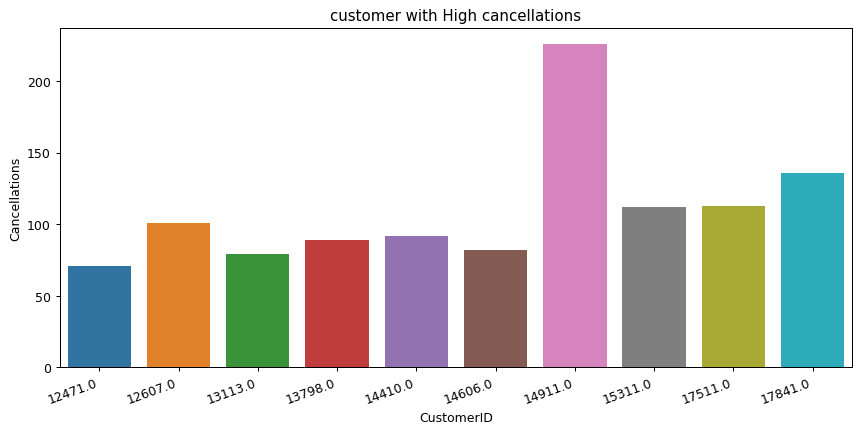

In [51]:
# Visualizing  
plt.figure(figsize=(25,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("customer with High cancellations")
sns.barplot(data=customer_cancellations.head(10),x="CustomerID",y="Cancellations")


# **6.Checking the number of cancellations countrywise.**

---



In [54]:
country_cancellations = cancellations.groupby('Country').count()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False)
country_cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
country_cancellations.head()

,Country,Cancellations
27,United Kingdom,7501
11,Germany,453
7,EIRE,247
10,France,148
26,USA,112


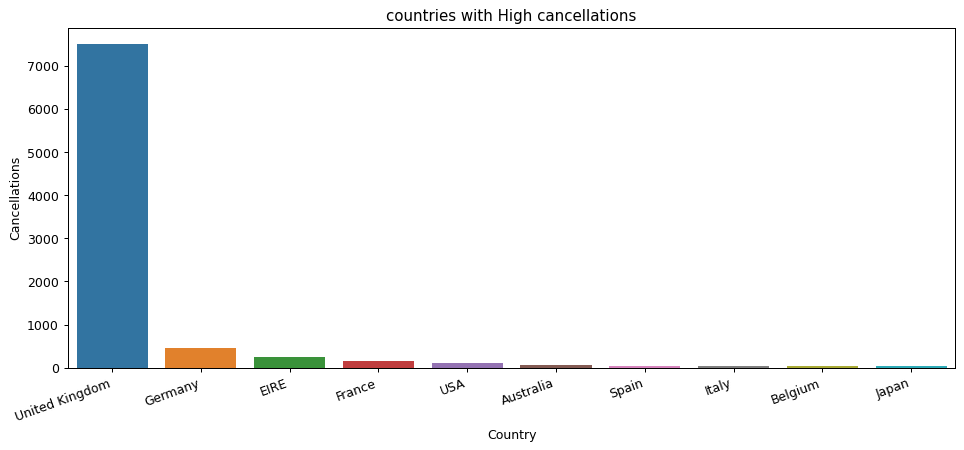

In [56]:
# Visualizing  
plt.figure(figsize=(28,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("countries with High cancellations")
sns.barplot(data=country_cancellations.head(10),x="Country",y="Cancellations")

# **Modeling Data set**

---



---



# **1.RFM Modelling**

  **1. R- Recency**

  **2. F- Frequency**

  **3. M- Monetary** 

Interpretation:

**1. Recency: How recent a customer made a purchase.**

**2. Frequency: How often a customer makes a purchase.**

**3. Monetary: How much money a customer spends.**

---



---



**Now if we take today’s date as the analyse date, then there will be a very serious difference. For this reason, we have set the next day of the maximum day of the data set as the analyse date (today’s date).**

In [57]:
# Adding 1 day to the Last Invoice date to set as Latest date for reference
LatestDate = df["InvoiceDate"].max() + pd.DateOffset(days=1)

# Creating a new dataframe to calculate Recency, Frequency and Monetary scores for each customer
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (LatestDate - x.max()).days,
                                    'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

# Renaming the columns
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency',
                    'TotalAmount': 'Monetary'}, inplace=True)

# Checking top 5 row
rfm.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40


In [58]:
# Calculating R, F and M scores by splitting Recency, Frequency	and Monetary based on quantiles
rfm['R'] = pd.qcut(rfm['Recency'], q=4, labels=[4,3,2,1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'], q=4, labels=[1,2,3,4]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'], q=4, labels=[1,2,3,4]).astype(int)

# Finding the RFM Group for each customer by combining the factors R,Fand M
rfm['RFM'] = 100*rfm['R'] + 10*rfm['F'] + rfm['M']

# Finding the RFM Score for each customer by adding the factors R,Fand M
rfm['RFM_Score'] = rfm['R'] + rfm['F'] + rfm['M']

In [59]:
# Handling the zeroes in the dataframe to avoid error in transformations
rfm.replace(0.0,1,inplace=True)

# Applying Log transformation on columns for smoothening the distribution
rfm['Recency_Log']   = rfm['Recency'].apply(np.log)
rfm['Frequency_Log'] = rfm['Frequency'].apply(np.log)
rfm['Monetary_Log']  = rfm['Monetary'].apply(np.log)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Recency_Log,Frequency_Log,Monetary_Log
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,5.786897,0.000000,11.253942
12347.0,2,182,4310.00,4,4,4,444,12,0.693147,5.204007,8.368693
12348.0,75,31,1797.24,2,2,4,224,8,4.317488,3.433987,7.494007
12349.0,19,73,1757.55,3,3,4,334,10,2.944439,4.290459,7.471676
12350.0,310,17,334.40,1,1,2,112,4,5.736572,2.833213,5.812338


In [60]:
# Checking Descriptive Stats
rfm.describe()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Recency_Log,Frequency_Log,Monetary_Log
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,92.518322,90.512100,2048.216154,2.514174,2.487670,2.499885,278.793962,7.501729,3.767274,3.670868,6.584187
std,100.009747,225.515328,8984.248299,1.126392,1.122724,1.118266,118.825268,2.816451,1.432382,1.321685,1.265573
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,111.000000,3.000000,0.000000,0.000000,0.000000
25%,18.000000,17.000000,306.455000,2.000000,1.000000,1.500000,211.000000,5.000000,2.890372,2.833213,5.725071
50%,51.000000,41.000000,668.560000,3.000000,2.000000,2.000000,311.000000,7.000000,3.931826,3.713572,6.505126
75%,142.000000,98.000000,1660.315000,4.000000,3.000000,3.500000,411.000000,10.000000,4.955827,4.584967,7.414763
max,374.000000,7676.000000,280206.020000,4.000000,4.000000,4.000000,444.000000,12.000000,5.924256,8.945854,12.543280


# **Visualizing the distributions before and after log transformation.**

---



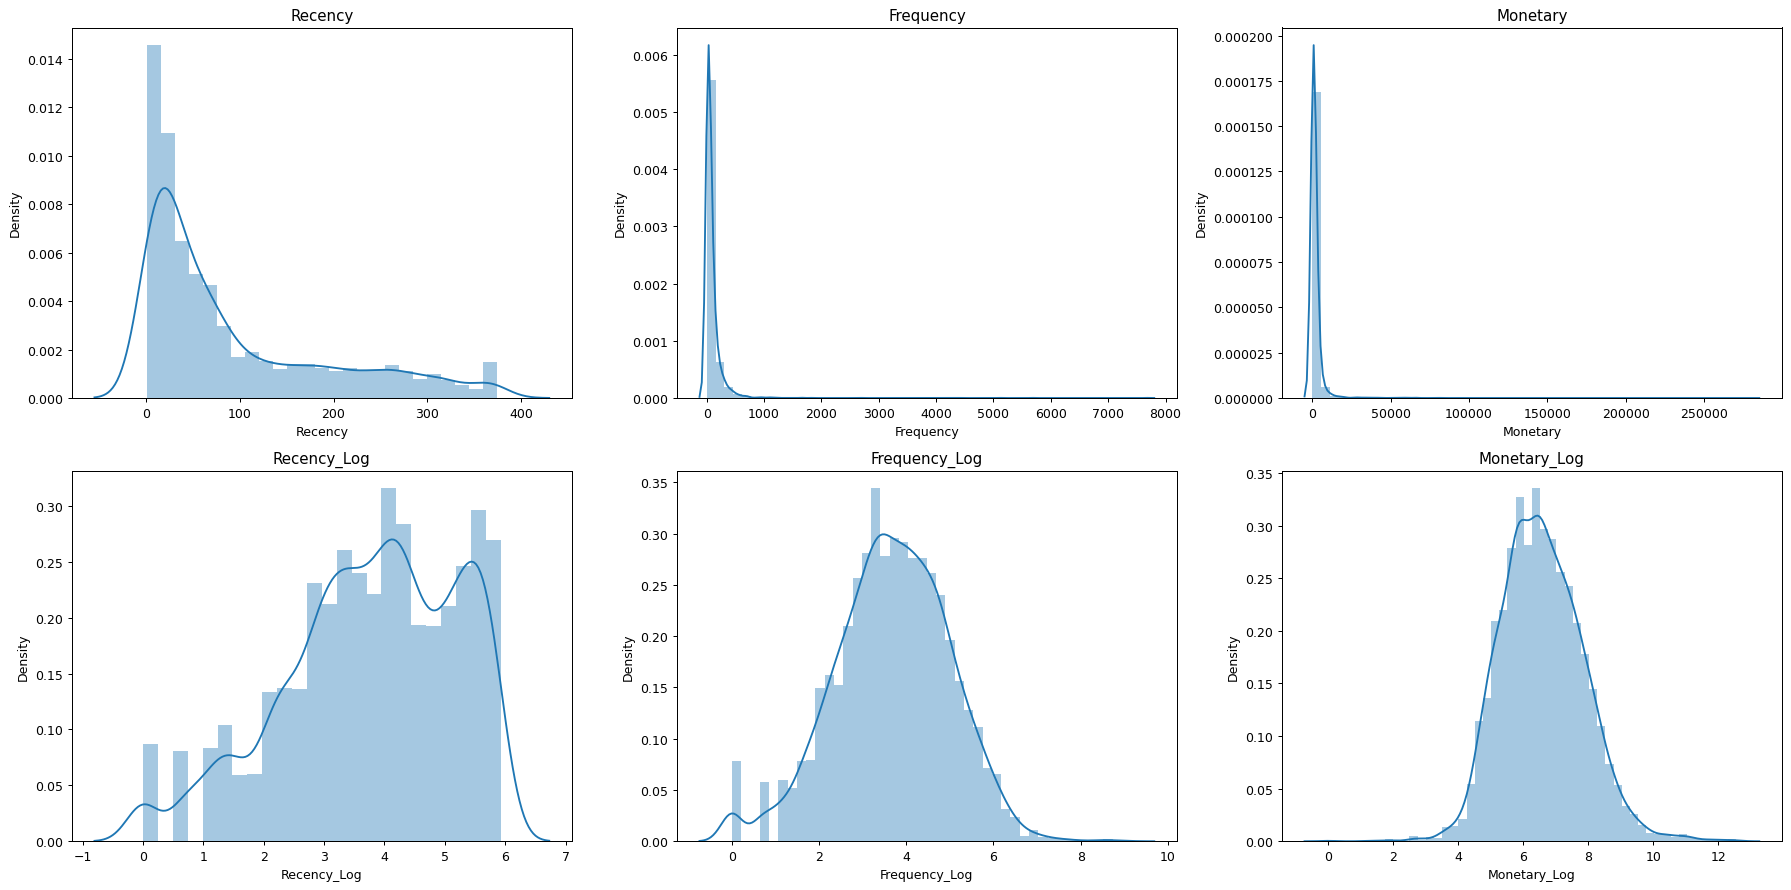

In [61]:
# Visualizing 
target = ['Recency', 'Frequency',	'Monetary', 'Recency_Log', 'Frequency_Log', 'Monetary_Log']
plt.figure(figsize=(20,10), dpi=90)
for n,col in enumerate(target):
  plt.subplot(2, 3, n+1)
  sns.distplot(rfm[col])
  plt.title(col.title())
  plt.tight_layout()

In [65]:
rfm['RFM_Score'].unique()

array([ 6, 12,  8, 10,  4,  3,  7, 11,  9,  5])

In [68]:
# Assign Loyelty Level to each customer
Customer_Loyaly_level = ['Grade-A','Grade-B','Grade-C','Grade-D']

Score_cut = pd.qcut(rfm['RFM_Score'],q = 4,labels=Customer_Loyaly_level)
rfm['RFM_Customer_Loyaly_level'] = Score_cut.values
rfm.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Recency_Log,Frequency_Log,Monetary_Log,RFM_Customer_Loyaly_level
0,12346.0,326,1,77183.60,1,1,4,114,6,5.786897,0.000000,11.253942,Grade-B
1,12347.0,2,182,4310.00,4,4,4,444,12,0.693147,5.204007,8.368693,Grade-D
2,12348.0,75,31,1797.24,2,2,4,224,8,4.317488,3.433987,7.494007,Grade-C
3,12349.0,19,73,1757.55,3,3,4,334,10,2.944439,4.290459,7.471676,Grade-C
4,12350.0,310,17,334.40,1,1,2,112,4,5.736572,2.833213,5.812338,Grade-A


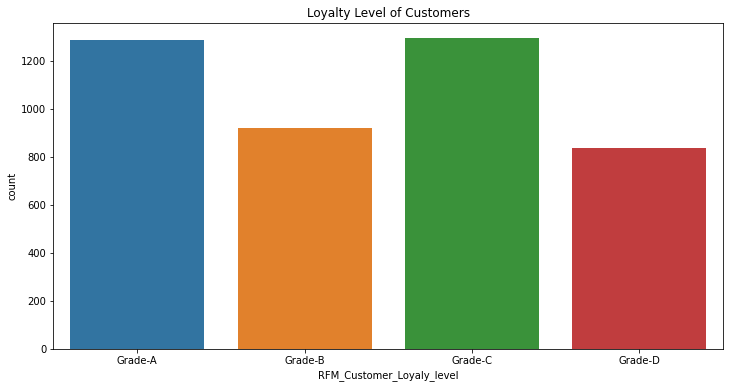

In [84]:
# Plot the loyelty level
plt.figure(figsize=(12,6))
sns.countplot(rfm['RFM_Customer_Loyaly_level'])
plt.title('Loyalty Level of Customers')

plt.show()

# **Clustering**

---



---



# **K-Means**


---



---



In [85]:
# Defining X Variables
X = rfm[['Recency_Log','Frequency_Log','Monetary_Log']]
X = StandardScaler().fit_transform(X)

In [93]:
# Initializing an empty dictionary to store the stats and summary for all clusters 
conclusion={}

# Definin a function to remove the outliers
def cap_outliers(col,overlap_supress):
  '''
    Takes a column and removes the outliers based on the overlap_supress value
    col: column to be cleaned
    overlap_supress: value to be used to remove the outliers
    Type:
    col: pandas.Series
    overlap_supress: float

    Returns:Capped column with outliers removed
  '''
  condition1=col < col.quantile(1-overlap_supress)
  condition2=col > col.quantile(overlap_supress)
  return col[condition1 & condition2]

# Function for displaying the stats of Recency, Frequency and Monetary for each group
def cluster_stats(data, segment_name):
  '''
    Type:data: pandas.DataFrame
    Type:segment_name: str
    Returns: pandas.DataFrame
    Features:This function prints the mean median and count of Recency, Frequency and Monetary for each group
    This function prints 0.25th and 0.75th Quantile of Recency, Frequency and Monetary for each group
  '''
  # Storing the mean median and count of Recency, Frequency and Monetary for each group
  stats = data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg(['mean','median'])
  stats['Count'] = data[segment_name].value_counts()

  # Storing 0.25th and 0.75th Quantile of Recency, Frequency and Monetary for each group
  summary = data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg({
          "Recency"   :lambda x : f'{int(x.quantile(0.25))} to {int(x.quantile(0.75))} days ago',
          "Frequency" :lambda x : f"Bought {int(x.quantile(0.25))} to {int(x.quantile(0.75))} times",
          "Monetary"  :lambda x : f"Spent around {int(x.quantile(0.25))} to {int(x.quantile(0.75))} Sterling"})
  
  # Changing the name for the columns 
  stats.columns = [f'{i}_{j}' for i, j in stats.columns]
  summary.columns=["Last_visited",'Purchase_frequency',"Money_spent"]

  return stats, summary

# Defining a function for plotting clusters for Visualization
def plots_stats_summary(y, segment_name, title, overlap_supress=0.2):
  '''
  Arguments:
    Type:y: pandas.Series
    Type:title: str
    Type:segment_name: str
    Type:overlap_supress: float
  Returns: Array of DataFrames
  features:This function plots the clusters for the given data and returns the dataframes for the clusters with conclusions and stats
  '''
  rfm[segment_name] = y                                               # Copying segment values to main data frame
  groups = sorted(rfm[segment_name].unique())                         # store legends for features.
  # Calling the cluster_stats Function and saving outputs into variable
  stats, summary = cluster_stats(rfm,segment_name) 

  # PART 1 : Visyualizing the scatter plots for all clusters
  plt.figure(figsize = (18, 6), dpi=90)                               # Setting the size of the figure
  ax = plt.axes(projection ="3d")                                     # initializing axes
  ax.set_xlabel('Recency', fontweight ='bold')                        # Setting X label
  ax.set_ylabel('Frequency', fontweight ='bold')                      # Setting Y label
  ax.set_zlabel('Monetary', fontweight ='bold')                       # Setting Z label
  ax.set_title(title, fontweight ='bold')                             # Setting main title
  ax = ax.scatter(X[:, 0], X[:, 1], X[:, 2] ,c=y, cmap='viridis')     # Plotting scatter plot in 3 dimensions
  plt.legend(*ax.legend_elements(),prop={'size': 15})                 # positioning legend

  # PART 2 : Plotting the distribution
  fig,ax = plt.subplots(3,figsize=(18, 18), dpi=90)                  # Setting the size of the figure
  # Running a for loop for iterating through the number of clusters
  for i in groups:
    # Running a for loop for iterating through columns
    for index, col in enumerate(["Recency", "Frequency", "Monetary"]):
      # Plotting distributions of Recency, Frequency and Monetary
      sns.distplot(cap_outliers(rfm[rfm[segment_name]==i][col], overlap_supress),ax=ax[index] ,kde_kws=dict(linewidth=5))
      ax[index].set_title(f'{col} Distribution', fontweight ='bold')  # Setting the main title
      ax[index].legend(groups,prop={'size': 15})                      # Assiging legends for all the axes
  plt.show()

  # PART 3 : # Displaying the stats and summary
  # Displaying the mean median and count of Recency, Frequency and Monetary for each group
  print('\n\nDisplaying the mean median and count of Recency, Frequency and Monetary for each group with the description:\n')
  display(stats.reset_index().style.hide_index().background_gradient(cmap="plasma"))
  display(summary.reset_index().style.set_properties(**{'text-align': 'left'}).hide_index().background_gradient(cmap="plasma"))

  return stats, summary

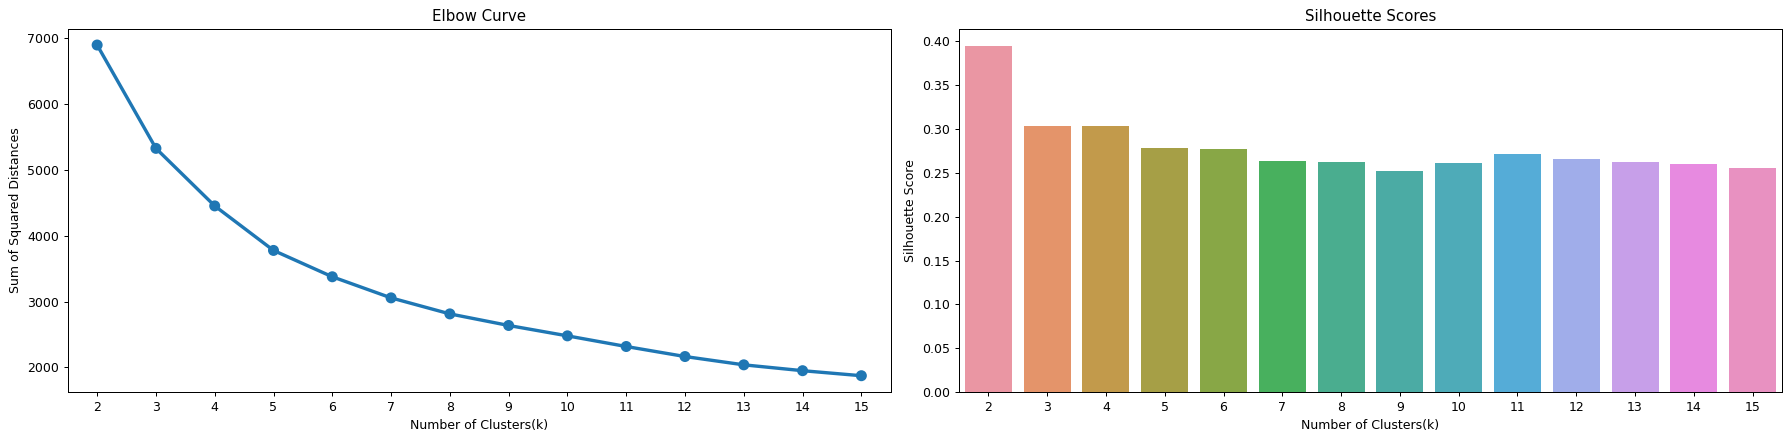

In [94]:
# Storing sum of squared distances and Silhouette Scores for each value of k in k means clusterer
ssd,score = [],[]
# Setting figure Size
plt.figure(figsize=(20,5), dpi=90)

# Initializing the list of clusters for tuning the best clusters
n_clusters = list(range(2,16))

# Running a for loop of Kmeans algorithm
for k in n_clusters:
    clusterer = KMeans(n_clusters = k, init= 'k-means++', max_iter= 1000)
    y_preds = clusterer.fit_predict(X)                                          # Fitting the model
    ssd.append(clusterer.inertia_)                                              # Appending the inertia
    score.append(silhouette_score(X, y_preds))                                  # Appending the silhoutte score

# Plotting Elbow curve to find optimal K
plt.subplot(1, 2, 1)                                                            #Initializing subplots
sns.pointplot(x=n_clusters, y=ssd)                                              # plotting point plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Sum of Squared Distances')                                          # Setting y label
plt.title('Elbow Curve')                                                        # Setting the title

# Silhouette Score v/s Number of Clusters
plt.subplot(1, 2, 2)                                                            #Initializing subplots
sns.barplot(x=n_clusters, y=score)                                              # plotting bar plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Silhouette Score')                                                  # Setting y label
plt.title('Silhouette Scores')                                                  # Setting the title
plt.tight_layout()

**If we look at both of the graphs at the same time to decide the optimal number of clusters, we can take the intersection of set of good n_clusters obtained from both the graphs. So 4 appears to be a good choice, having a decent Silhouette score as well as near the elbow of the elbow curve.**

**1.Fitting the model on n_clusters = 2 based on Silhouette_Score to visualise the segments.**

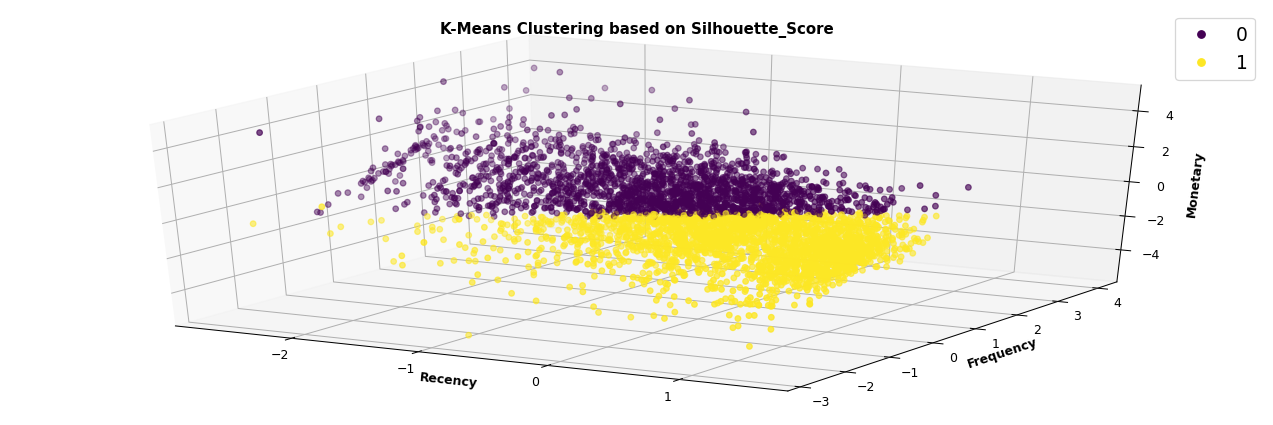

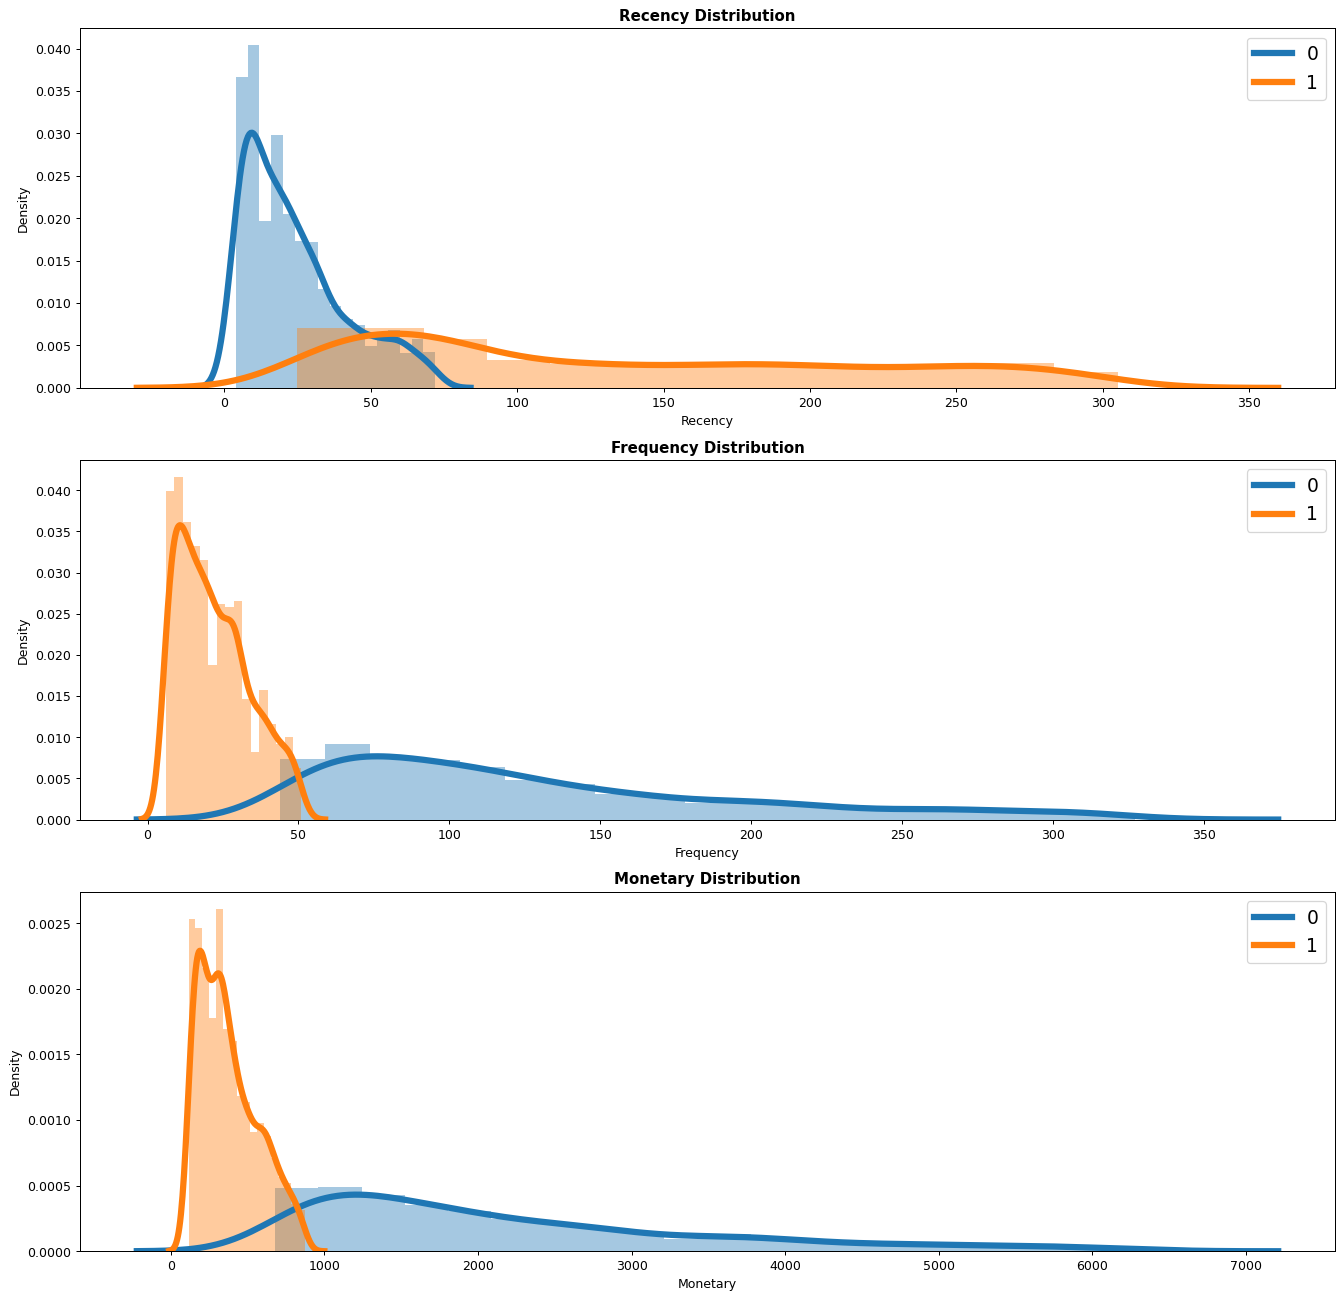



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



K-Means|2Cluster,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
0,31.189512,18.000000,172.987020,108.000000,4025.002078,1821.530000,1926
1,141.469540,109.000000,24.682553,19.000000,470.391998,331.000000,2413


K-Means|2Cluster,Last_visited,Purchase_frequency,Money_spent
0,8 to 39 days ago,Bought 67 to 191 times,Spent around 1064 to 3349 Sterling
1,51 to 227 days ago,Bought 10 to 33 times,Spent around 188 to 567 Sterling


In [95]:
# Fitting the model on n_clusters = 2 based on Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=2,init="k-means++")             # Setting 2 Clusters
y = kmc.fit_predict(X)                                  # FItting the model
centers = kmc.cluster_centers_                          # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Silhouette_Score'  # Setting the title
segment_name = 'K-Means|2Cluster'
overlap_supress = 0.1
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)